<a href="https://colab.research.google.com/github/ftornay/TFG/blob/master/A/IAPS_databunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *

In [ ]:
# Activar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos los datos del disco
iaps_path = Path("/content/drive/MyDrive/IAPS")
iaps_data = pd.read_pickle(iaps_path/'iaps_data.pkl')
iaps_data.tail()

,descripcion,conjunto,val.media.total,val.dt.total,ar.media.total,ar.dt.total,dom.media.total,dom.dt.total,val.media.hombres,val.dt.hombres,ar.media.hombres,ar.dt.hombres,dom.media.hombres,dom.dt.hombres,val.media.mujeres,val.dt.mujeres,ar.media.mujeres,ar.dt.mujeres,dom.media.mujeres,dom.dt.mujeres,ruta_img
imagen,,,,,,,,,,,,,,,,,,,,,
9910,Accidente de coche,5,2.29,1.49,6.92,2.11,2.79,1.90,2.94,1.61,6.28,2.24,3.36,2.01,1.88,1.24,7.33,1.92,2.42,1.74,Imágenes/SET1_14.zip (Unzipped Files)/IAPS1_12...
9911,Accidente de coche,7,2.25,1.39,5.87,2.14,2.86,1.88,2.47,1.45,5.91,2.08,3.11,1.78,2.10,1.33,5.84,2.19,2.70,1.94,Imágenes/SET1_14.zip (Unzipped Files)/IAPS1_12...
9912,Choque,8,3.13,1.57,5.03,2.13,3.82,1.81,3.48,1.72,5.15,2.13,3.69,1.81,2.90,1.43,4.96,2.14,3.90,1.81,Imágenes/SET1_14.zip (Unzipped Files)/IAPS1_12...
9920,Accidente de coche,6,2.17,1.34,6.57,2.10,3.00,1.97,2.50,1.34,6.36,2.20,3.27,1.90,1.99,1.31,6.68,2.05,2.85,2.00,Imágenes/SET1_14.zip (Unzipped Files)/IAPS1_12...
9921,Incendio,7,2.18,1.54,6.53,1.98,2.96,2.08,2.66,1.47,6.76,1.97,3.74,2.22,1.85,1.51,6.38,1.97,2.44,1.81,Imágenes/SET1_14.zip (Unzipped Files)/IAPS1_12...


In [ ]:
# Salen advertencias de fastai
# Las ignoramos
import warnings
warnings.filterwarnings("ignore")

# Creamos el databunch
# Atención: esto es fastai1!!!
tfmns = get_transforms()
data = (
        ImageList.from_df(iaps_data, path=iaps_path, cols='ruta_img')
        .split_by_rand_pct(valid_pct=0.2, seed=753)
        .label_from_df(cols=[2, 4, 6], label_cls=FloatList) # val, ar y dom medias totales
        .transform(tfmns, tfm_y=False, size=(480, 640))
        .databunch()
        .normalize(imagenet_stats)
)

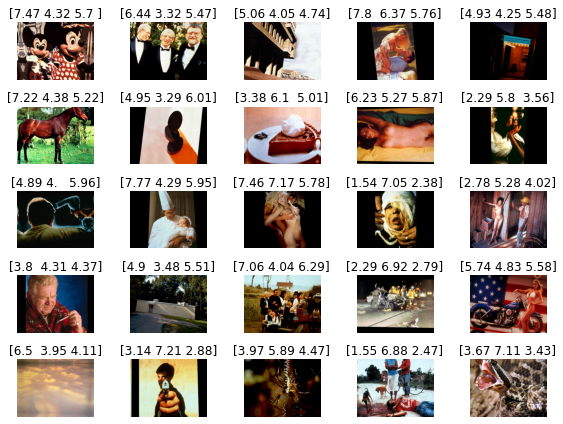

In [ ]:
# Y vemos los datos
data.show_batch(max_n=9, figsize=(8,6))

In [ ]:
# Guardamos el databunch
data.save(iaps_path/'iaps_db.pkl')

In [ ]:
db = load_data(iaps_path, 'iaps_db.pkl')

In [ ]:
db.one_batch()

(tensor([[[[1.9601e-03, 1.6905e-03, 3.0992e-03,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           ...,
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.2070e-01,
            7.3837e-01, 7.5929e-01],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.3152e-01,
            7.2565e-01, 7.7126e-01],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.2095e-01,
            7.0641e-01, 7.6243e-01]],
 
          [[1.2859e-03, 1.9795e-03, 2.2600e-03,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           [7.7090e-07, 7.7090e-07, 7.7090e-07,  ..., 7.7090e-07,
            7.7090e-07, 7.7090e-07],
           ...,
           [7.7090e-07, 7.7090e-07, 7.